# Eight-puzzle solver
## Name : Ilyas Yeskenov, Kattia Rahi
## Student ID: 4058811, 4154005
## Course code: CDS2002
## Section: CRN164

## Description:
## We wrote the programme in the jupyter notebook and google collab system and saved as ipynb file, so it will be more comfortable and readable to open this file with this apps
## The solution uses different libraries and data structures such as lists and dictionaries


In [1]:
#Importing required libraries
import numpy as np
import heapq
import random
import time
from queue import PriorityQueue
import matplotlib.pyplot as plt



## PART 2
## Defining searching algorithms and solving one example


In [14]:
#Defining some useful functions

#Function that displays the nparray without square brackets
def display(nparray):
    for i in range(3):
        print(*nparray[i])

#Function for generating random puzzle
def generate_rand_puzzle():
    s = [i for i in range(0,9)]
    random.shuffle(s)
    return tuple(s)
 

#Function for checking solvability of the random puzzle
def check_solvability(tuple1):

    inversions = 0
  #Counting inversions

    for i in range(len(tuple1)):
        for j in range(i,len(tuple1)):
            if tuple1[i]>tuple1[j] and tuple1[j]!=0:
                inversions+=1

    if inversions%2==0:
        return "solvable"
    else:
        return "unsolvable"


#Function that converts converts the puzzle from nparray to the string
def encode(board):
    ans = ''
    for row in board:
        for element in row:
            ans+=element
    return ans
    

#Function that converts converts the puzzle from string to nparray
def decode(state):
    list_state = [i for i in state]
    answer = np.array((list_state)).reshape((3,3))
    return answer


#Function that calculates heuristics(number of misplaced positions including empty tile)
def heuristics(new_state, goal_state):
    return np.sum(new_state!= goal_state)


In [16]:
#Reading and printing initial state puzzle
initial = input("Input a puzzle in a tuple form(with comma and no spaces): ")
list_i = [int(i) for i in initial.split(',')]


for i in range(len(list_i)):
    if list_i[i] == 0:
        list_i[i] = '#'

initial_state = np.array((list_i)).reshape((3,3))

print("The input puzzle is as follows:")
display(initial_state)



Input a puzzle in a tuple form(with comma and no spaces): 4,1,3,0,2,5,6,7,8
The input puzzle is as follows:
4 1 3
# 2 5
6 7 8


In [17]:

#Reading and printing goal state puzzle
goal = input("Please input the goal state(with comma and no spaces): ")
list_g = [int(i) for i in goal.split(',')]


for i in range(len(list_g)):
    if list_g[i] == 0:
        list_g[i] = '#'

goal_state = np.array((list_g)).reshape((3,3))

print("The goal state of your puzzle is as follows:")
display(goal_state)


Please input the goal state(with comma and no spaces): 1,2,3,4,0,5,6,7,8
The goal state of your puzzle is as follows:
1 2 3
4 # 5
6 7 8


In [18]:
def uniform_cost_search(initial_state, goal_state):
    #Defining list STATES which will save the possible nodes and dict Parent which has states in keys and parent states in values 
    states = list()
    parent = dict()

    q = PriorityQueue() # tuple [distance, encoded_board(as a string)]
    
    #Converting states to the string
    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)
    
    #Saving initial state 
    states.append(initial_encoded)
    q.put([0, initial_encoded])

    while q:
        #Getting the data of the board with the minimal distance
        v = q.get()

        distance, board_encoded = v
       

        if board_encoded == goal_encoded:
            break
        
        #Saving the state in nparray state
        board = decode(board_encoded)

        #Identifying the position of the empty tile
        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]
        
        #Considering possible child states
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                #Saving the new state as a child_state
                child_state = encode(board)
                #Returning board to initial position
                board[nx][ny] = board[row][col]
                board[row][col] = '#'
                
                #Saving child_state in states, parent and queue(q)
                if child_state not in states:
                    states.append(child_state) 
                    parent[child_state] = board_encoded
                    #Distance incresed by 1
                    q.put([distance+1, child_state])

    #Making the path of the solution from parent dictionary
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    path = path[::-1]
    
    #Printing the result
    print('Input:')
    display(initial_state)
    print('')

    
    for i in range(len(path)):
        print('Step'+' '+str(i+1)+':')
        display(decode(path[i]))
        print('')
    
    print("Goal state:")
    display(goal_state)
    print('')
    print("The length of the solution of Uniform-Cost Search is"+ " "+ str(len(path)))
    

In [19]:
def best_first_search(initial_state, goal_state):
    #Defining list STATES which will save the possible nodes and dict PARENT which has states in keys and parent states in values 
    states = list()
    parent = dict()
    
    q = PriorityQueue() # tuple [distance, encoded_board(as a string)]
    
    #Converting states to the string
    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)
    
    #Finding and saving heuristics of the initial state
    initial_heuristics = heuristics(initial_state, goal_state)
    states.append(initial_encoded)
    q.put([initial_heuristics, initial_encoded])

    while q:
        #Getting the data of the board with the minimal heuristics
        v = q.get()

        heuristic, board_encoded = v
        if board_encoded == goal_encoded:
            break
            
        #Saving the state as nparray
        board = decode(board_encoded)
        
        #Identifying the position of the empty tile
        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]
        
        #Considering possible child states
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                #Saving the new state as a child_state
                child_state = encode(board)
                #Returning board to initial position 
                board[nx][ny] = board[row][col]
                board[row][col] = '#'
                
                #Saving child_state in states, parent and in queue(q) with heuristics value
                if child_state not in states:
                    parent[child_state] = board_encoded
                    states.append(child_state)
                    q.put([heuristics(decode(child_state), goal_state), child_state])
                    
    #Making the path of the solution from parent dictionary                
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    
    path = path[::-1]
    
    #Printing the results
    print('Input:')
    display(initial_state)
    print('')

    
    for i in range(len(path)):
        print('Step'+' '+str(i+1)+':')
        display(decode(path[i]))
        print('')
    
    print("Goal state:")
    display(goal_state)
    print('')
    print("The length of the solution of  Best-first Search is"+ " "+str(len(path)))
                 

In [20]:
def astar(initial_state, goal_state):
    #In the A-star algorithm we will use F = distance from the initial state + heuristics
    
    #Defining list STATES which will save the possible nodes and dict PARENT which has states in keys and parent states in values 
    states = list()
    parent = dict()
    
    q = PriorityQueue() # tuple [distance, encoded_board(as a string)]
    
    #Converting states to the string
    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)
    
    #Finding and saving F of the initial state(F=0+distance)
    initial_heuristics = heuristics(initial_state, goal_state)
    states.append(initial_encoded)
    q.put([initial_heuristics, initial_encoded])
    
    
    while q:
        #Getting the data of the board with the minimal F
        v = q.get()

        heuristic, board_encoded = v
        if board_encoded == goal_encoded:
            break
            
        #Saving the state as nparray
        board = decode(board_encoded)
        
        #Identifying the position of the empty tile
        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]
        
        #Considering possible child states
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                #Saving the new state as a child_state
                child_state = encode(board)
                #Returning board to initial position 
                board[nx][ny] = board[row][col]
                board[row][col] = '#'
                
                #Saving child_state in states, parent and in queue(q) with F value
                if child_state not in states:    
                    distance = heuristics(initial_state, decode(child_state))-1
                    parent[child_state] = board_encoded
                    states.append(child_state)
                    q.put([heuristics(decode(child_state), goal_state)+distance, child_state])
    #Making the path of the solution from parent dictionary
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    path = path[::-1]
    
    #Printing the results
    print('Input:')
    display(initial_state)
    print('')

    for i in range(len(path)):
        print('Step'+' '+str(i+1)+':')
        display(decode(path[i]))
        print('')
    
    print("Goal state:")
    display(goal_state)
    print('')
    print("The length of the solution of A-star Search is"+ " "+str(len(path)))

In [21]:
uniform_cost_search(initial_state, goal_state)

Input:
4 1 3
# 2 5
6 7 8

Step 1:
# 1 3
4 2 5
6 7 8

Step 2:
1 # 3
4 2 5
6 7 8

Step 3:
1 2 3
4 # 5
6 7 8

Goal state:
1 2 3
4 # 5
6 7 8

The length of the solution of Uniform-Cost Search is 3


In [22]:
astar(initial_state, goal_state)

Input:
4 1 3
# 2 5
6 7 8

Step 1:
# 1 3
4 2 5
6 7 8

Step 2:
1 # 3
4 2 5
6 7 8

Step 3:
1 2 3
4 # 5
6 7 8

Goal state:
1 2 3
4 # 5
6 7 8

The length of the solution of A-star Search is 3


In [23]:
best_first_search(initial_state, goal_state)

Input:
4 1 3
# 2 5
6 7 8

Step 1:
# 1 3
4 2 5
6 7 8

Step 2:
1 # 3
4 2 5
6 7 8

Step 3:
1 2 3
4 # 5
6 7 8

Goal state:
1 2 3
4 # 5
6 7 8

The length of the solution of  Best-first Search is 3


# PART 2
## Testing and comparing algorithms on different puzzles

In [24]:
#Defining searching algorithms again so that they will only return length of solution


def UCS(initial_state, goal_state):
    
    states = list()
    parent = dict()


    q = PriorityQueue() # tuple [distance, encoded_board]

    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)

    q.put([0, initial_encoded])

    while q:
        v = q.get()

        distance, board_encoded = v
        if board_encoded == goal_encoded:
            break

        board = decode(board_encoded)

        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                child_state = encode(board)
                board[nx][ny] = board[row][col]
                board[row][col] = '#'

                if child_state not in states:
                    states.append(child_state) 
                    parent[child_state] = board_encoded
                    q.put([distance+1, child_state])

    
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    path = path[::-1]
    
    return len(path)

###########################################################

def Astar(initial_state, goal_state):
    states = list()
    parent = dict()
    
    initial_heuristics = heuristics(initial_state, goal_state)

    q = PriorityQueue() # tuple [distance, encoded_board]

    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)
    
    states.append(initial_encoded)
    
    q.put([initial_heuristics, initial_encoded])
    
    while q:
        v = q.get()

        heuristic, board_encoded = v
        if board_encoded == goal_encoded:
            break

        board = decode(board_encoded)

        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]

        for dx, dy in [(0, -1), (0, 1),(-1, 0), (1, 0)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                child_state = encode(board)  
                board[nx][ny] = board[row][col]
                board[row][col] = '#'
                
            
                if child_state not in states:
                    
                    distance = heuristics(initial_state, decode(child_state))-1
                    parent[child_state] = board_encoded
                    states.append(child_state)
                    q.put([heuristics(decode(child_state), goal_state)+distance, child_state])
    
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    path = path[::-1]
    
    return len(path)

##########################################################

def BCS(initial_state, goal_state):
    states = list()
    parent = dict()
    
    initial_heuristics = heuristics(initial_state, goal_state)

    q = PriorityQueue() # tuple [distance, encoded_board]

    initial_encoded = encode(initial_state)
    goal_encoded = encode(goal_state)
    
    
    states.append(initial_encoded)
    q.put([initial_heuristics, initial_encoded])

    while q:
        v = q.get()

        heuristic, board_encoded = v
        if board_encoded == goal_encoded:
            break

        board = decode(board_encoded)

        for i in range(3):
            for j in range(3):
                if board[i][j] == '#':
                    pos = (i, j)

        row = pos[0]
        col = pos[1]
        

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < 3 and 0 <= ny < 3:

                board[row][col] = board[nx][ny]
                board[nx][ny] = '#'
                child_state = encode(board)  
                board[nx][ny] = board[row][col]
                board[row][col] = '#'
                
                if child_state not in states:
                    parent[child_state] = board_encoded
                    states.append(child_state)
                    q.put([heuristics(decode(child_state), goal_state), child_state])
                     
    state = goal_encoded
    path = list()
    while state != initial_encoded:
        path.append(state)
        state = parent[state]
    
    path = path[::-1]
    
    return len(path) 

In [25]:
#Puzzles for algorithm testing
testing_puzzles = [[2, 1, 5, 8, 4, 3, 0, 6, 7],
 [5, 2, 0, 1, 7, 3, 4, 6, 8],
 [1, 0, 6, 2, 4, 8, 3, 5, 7],
 [0, 1, 3, 2, 8, 5, 6, 7, 4],
 [1, 3, 2, 6, 8, 0, 5, 7, 4],
 [1, 6, 2, 0, 7, 4, 3, 5, 8],
 [1, 2, 6, 0, 5, 8, 3, 4, 7],
 [3, 4, 1, 2, 7, 0, 6, 8, 5],
 [1, 8, 3, 2, 0, 4, 5, 7, 6],
 [4, 2, 3, 5, 6, 0, 7, 1, 8]]

goal_state1 = np.array(['1', '2', '3','4', '5', '6','7', '8', '#']).reshape((3,3))

#Changing them into numpy arrays
for j in range(10):
    for i in range(9):
        if testing_puzzles[j][i]==0:
            testing_puzzles[j][i]='#'
    testing_puzzles[j]  = np.array(testing_puzzles[j]).reshape((3,3))


goal_state1

array([['1', '2', '3'],
       ['4', '5', '6'],
       ['7', '8', '#']], dtype='<U1')

In [26]:
#Saving time and steps for each algorithm
bcs_time = list()
ucs_time = list()
Astar_time = list()

bcs_steps = list()
ucs_steps= list()
Astar_steps = list()


for i in range(10):
    start_time = time.time()
    UCS(testing_puzzles[i], goal_state1)
    elapsed_time = time.time()-start_time
    ucs_time.append(elapsed_time)
    ucs_steps.append(UCS(testing_puzzles[i], goal_state1))

In [27]:
for i in range(10):
    start_time = time.time()
    BCS(testing_puzzles[i], goal_state)
    elapsed_time = time.time()-start_time
    bcs_time.append(elapsed_time)
    bcs_steps.append(BCS(testing_puzzles[i], goal_state1))

In [28]:
for i in range(10):
    start_time = time.time()
    Astar(testing_puzzles[i], goal_state)
    elapsed_time = time.time()-start_time
    Astar_time.append(elapsed_time)
    Astar_steps.append(Astar(testing_puzzles[i], goal_state1))

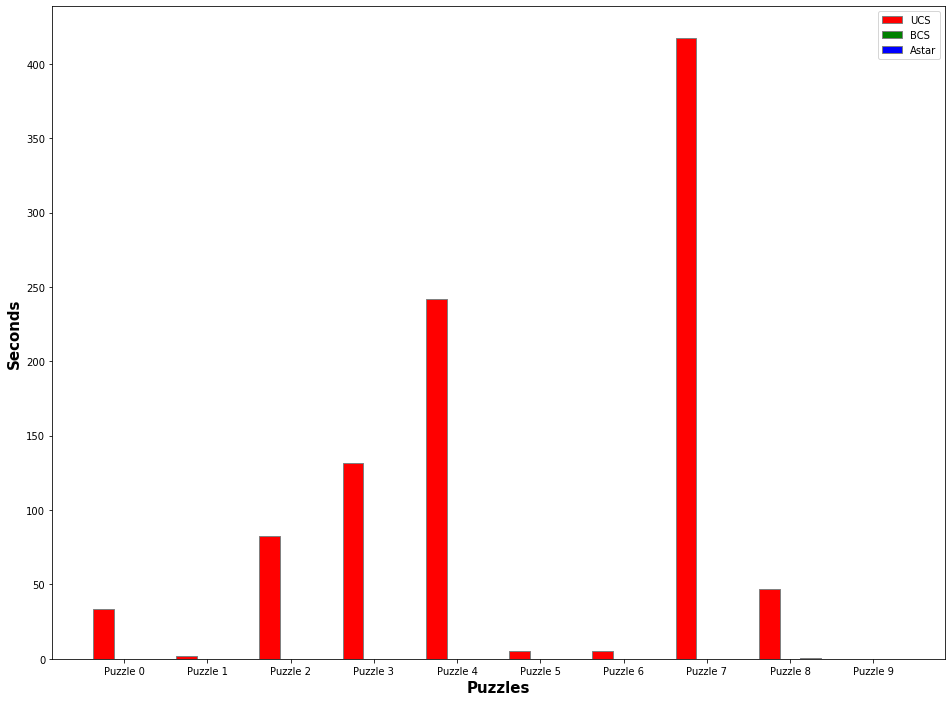

In [34]:
# Graphing the time of performances

labels = ['Puzzle 0','Puzzle 1','Puzzle 2','Puzzle 3','Puzzle 4','Puzzle 5','Puzzle 6','Puzzle 7','Puzzle 8','Puzzle 9']
barWidth = 0.25
fig = plt.subplots(figsize =(16, 12))
 
br1 = np.arange(len(bcs_time))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, ucs_time, color ='r', width = barWidth,
        edgecolor ='grey', label ='UCS')
plt.bar(br2, bcs_time, color ='g', width = barWidth,
        edgecolor ='grey', label ='BCS')
plt.bar(br3, Astar_time, color ='b', width = barWidth,
        edgecolor ='grey', label ='Astar')
 
# Adding Xticks
plt.xlabel('Puzzles', fontweight ='bold', fontsize = 15)
plt.ylabel('Seconds', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(bcs_time))],labels)
 
plt.legend()
plt.show()

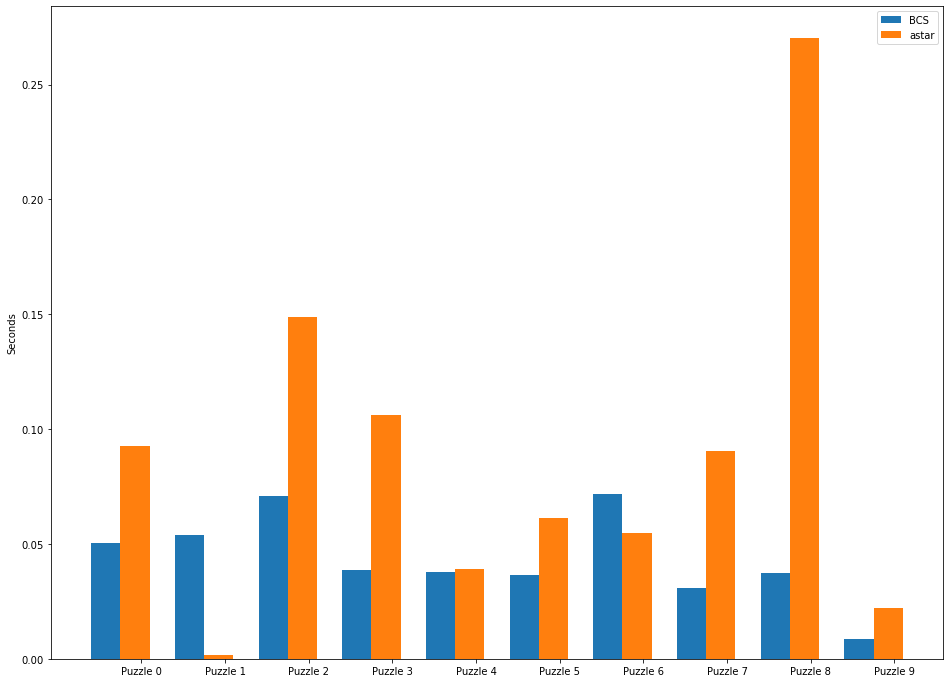

In [37]:
#Comparing time of bcs and astar since ucs values are too big
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(16, 12))
rects1 = ax.bar(x - width/2, bcs_time, width, label='BCS')
rects2 = ax.bar(x + width/2, Astar_time, width, label='astar')

ax.set_ylabel('Seconds')

plt.xticks([r + barWidth for r in range(len(bcs_time))],labels)

ax.legend()

plt.show()

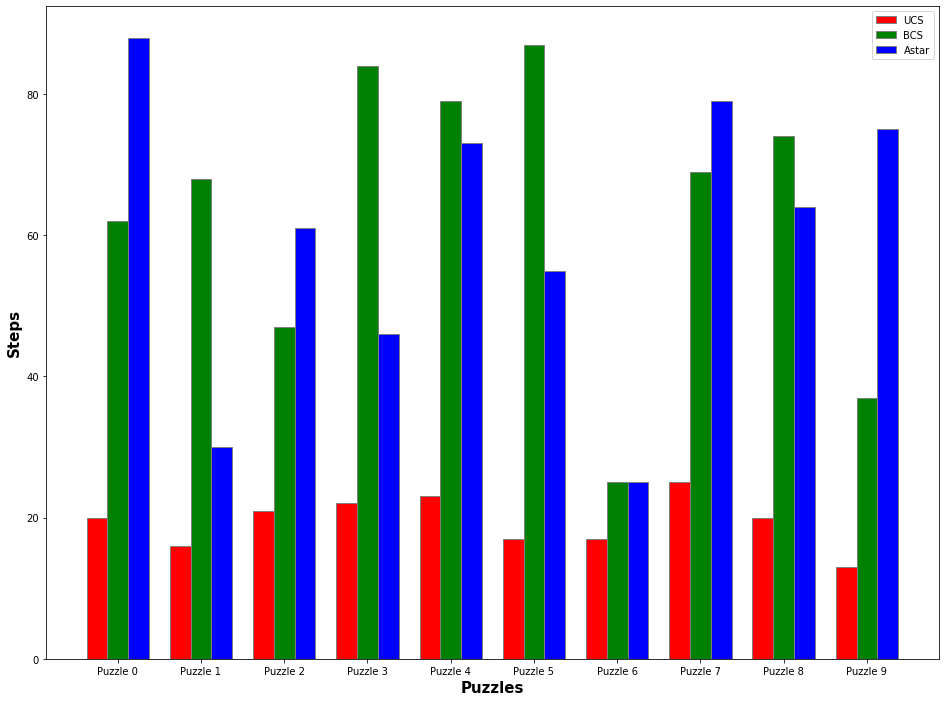

In [38]:
#Graph comparing number of steps of searching algorithms 
barWidth = 0.25
fig = plt.subplots(figsize =(16, 12))
 
br1 = np.arange(len(bcs_steps))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, ucs_steps, color ='r', width = barWidth,
        edgecolor ='grey', label ='UCS')
plt.bar(br2, bcs_steps, color ='g', width = barWidth,
        edgecolor ='grey', label ='BCS')
plt.bar(br3, Astar_steps, color ='b', width = barWidth,
        edgecolor ='grey', label ='Astar')
 
# Adding Xticks
plt.xlabel('Puzzles', fontweight ='bold', fontsize = 15)
plt.ylabel('Steps', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(bcs_time))],labels)
 
plt.legend()
plt.show()